In [2]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_img_ppm_to_Hz_data, convert_ppm_data_to_Hz_data
from demod import demod_pls
from extract_metric import extract_metrics

# <span style="color:orange"> *db0_035 processing* </span> 

In [3]:
path_to_fms = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/fms"
path_to_dmod_mask = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask.nii.gz"
path_to_labeled_cord = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz"
path_to_metrics = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics"
path_to_dmod_folder = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/V1_dmod_sim"

## Measured B0 - Inspiration & Expiration

### <span style="color:green"> Expiration </span> 

In [4]:
path_to_exp_meas = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\tests\test2_pro\B0.nii"
path_to_exp_dmod_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\cord_mask.nii.gz"
path_to_exp_metric_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\exp\cord_mask_labeled.nii.gz"

# For result save and loading
path_to_exp_dmod_fm = r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_dmod_B0_meas.nii.gz"
exp_B0_metrics_path =  r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_metrics.csv"

In [4]:
# Lets get the raw expiration data:
raw_exp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv"
extract_metrics(path_to_exp_meas, path_to_exp_dmod_mask, path_to_exp_metric_mask, raw_exp_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\tests\test2_pro\B0.nii -f E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\exp\cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv




In [5]:
# Import the data:
raw_exp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp/raw_exp_metrics.csv"
raw_exp_metrics_csv = pd.read_csv(raw_exp_metrics_path)

raw_exp_metrics= raw_exp_metrics_csv['WA()'][::-1]

raw_exp_metrics 

10   -277.540653
9    -269.654259
8    -236.683647
7    -183.535555
6    -122.279939
5    -124.904195
4    -135.579613
3    -130.387474
2    -109.990501
1    -105.908986
0    -145.287181
Name: WA(), dtype: float64

In [4]:
# Load images and get nifti data to manipulate!
exp_B0_meas_img = nib.load(path_to_exp_meas)
exp_B0_meas_data = exp_B0_meas_img.get_fdata()

exp_dmod_mask_img = nib.load(path_to_exp_dmod_mask)
exp_dmod_mask_data = exp_dmod_mask_img.get_fdata()

exp_metric_mask_img = nib.load(path_to_exp_metric_mask)
exp_metric_mask_data = exp_metric_mask_img.get_fdata()

In [32]:
exp_dmod_value = np.mean(exp_B0_meas_data[exp_dmod_mask_data==1])
print("Expiration demod value: ",exp_dmod_value," Hz")

Expiration demod value:  -185.77823289197374  Hz


In [33]:
exp_dmod_B0_meas = exp_B0_meas_data - exp_dmod_value
# Create nifti and save
exp_dmod_B0_meas_img = nib.Nifti1Image(exp_dmod_B0_meas, affine = exp_B0_meas_img.affine)
nib.save(exp_dmod_B0_meas_img, path_to_exp_dmod_fm)

In [34]:
# Extract metrics, plot and save value
extract_metrics(path_to_exp_dmod_fm, path_to_exp_dmod_mask, path_to_exp_metric_mask, exp_B0_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_dmod_B0_meas.nii.gz -f E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\exp\cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\exp\cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\exp\exp_metrics.csv




In [35]:
exp_metrics_df = pd.read_csv(exp_B0_metrics_path)
exp_metrics_data = exp_metrics_df['WA()']
exp_metrics_data = exp_metrics_data[::-1]
exp_metrics_data

10   -91.762421
9    -83.876026
8    -50.905414
7      2.242678
6     63.498293
5     60.874038
4     50.198620
3     55.390759
2     75.787731
1     79.869247
0     40.491052
Name: WA(), dtype: float64

### <span style="color:red"> Inspiration </span> 

In [6]:
path_to_insp_meas = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\tests\test2_pro\B0.nii"
path_to_insp_dmod_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\cord_mask.nii.gz"
path_to_insp_metric_mask = r"E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\insp\cord_mask_labeled.nii.gz"

# For result save and loading
path_to_insp_dmod_fm = r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\insp_dmod_B0_meas.nii.gz"
insp_B0_metrics_path =  r"E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\insp_metrics_test.csv"

In [9]:
# Lets get the raw expiration data:
raw_insp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv"
extract_metrics(path_to_insp_meas, path_to_insp_dmod_mask, path_to_insp_metric_mask, raw_insp_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\tests\test2_pro\B0.nii -f E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\insp\cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv




In [7]:
raw_insp_metrics_path = r"E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp/raw_insp_metrics.csv"
raw_insp_metrics_df = pd.read_csv(raw_insp_metrics_path)
raw_insp_metrics = raw_insp_metrics_df['WA()'][::-1]

raw_insp_metrics

10   -262.554534
9    -246.609818
8    -202.511716
7    -135.477820
6     -79.083717
5     -97.146527
4    -133.440034
3    -145.607452
2    -139.295199
1    -140.858648
0    -176.396718
Name: WA(), dtype: float64

In [12]:
# Load images and get nifti data to manipulate!
insp_B0_meas_img = nib.load(path_to_insp_meas)
insp_B0_meas_data = insp_B0_meas_img.get_fdata()

insp_dmod_mask_img = nib.load(path_to_insp_dmod_mask)
insp_dmod_mask_data = insp_dmod_mask_img.get_fdata()

insp_metric_mask_img = nib.load(path_to_insp_metric_mask)
insp_metric_mask_data = insp_metric_mask_img.get_fdata()

In [13]:
insp_dmod_value = np.mean(insp_B0_meas_data[insp_dmod_mask_data==1])
print("Inspiration demod value: ", insp_dmod_value," Hz")

Inspiration demod value:  -180.8621332313117  Hz


In [14]:
insp_dmod_B0_meas = insp_B0_meas_data - insp_dmod_value
# Create nifti and save
insp_dmod_B0_meas_img = nib.Nifti1Image(insp_dmod_B0_meas, affine = insp_B0_meas_img.affine)
nib.save(insp_dmod_B0_meas_img, path_to_insp_dmod_fm)

In [15]:
# Extract metrics, plot and save value
extract_metrics(path_to_insp_dmod_fm, path_to_insp_dmod_mask, path_to_insp_metric_mask, insp_B0_metrics_path, method='wa', vert="4:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\exp_dmod_B0_meas.nii.gz -f E:\msc_data\ismrm_2025\dB0_035\fm\C1_meas\insp\cord_mask.nii.gz -method wa -vert 4:14 -vertfile E:\msc_data\ismrm_2025\dB0_035\fm\processing_steps\D1_D2_label_vert\insp\cord_mask_labeled.nii.gz -perlevel 1 -o E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\exp_metrics_test.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:\msc_data\ismrm_2025\dB0_035\fm\C_dmod_meas\insp\exp_metrics_test.csv




In [17]:
insp_metrics_df = pd.read_csv(insp_B0_metrics_path)
insp_metrics_data = insp_metrics_df['WA()']
insp_metrics_data = insp_metrics_data[::-1]
insp_metrics_data

10    -81.692401
9     -65.747685
8     -21.649583
7      45.384313
6     101.778416
5      83.715607
4      47.422099
3      35.254681
2      41.566934
1      40.003485
0       4.465415
Name: WA(), dtype: float64

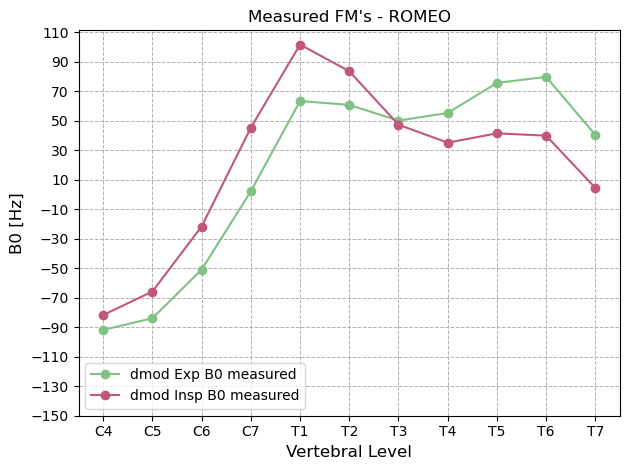

In [36]:
vertebrae_levels = [ 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "#C1577B")

plt.title("Measured FM's - ROMEO")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

yticks = range(-150, 121, 20) 
plt.yticks(yticks)

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### <span style="color:#C28AD1"> Average Insp and Exp </span> 

In [8]:
path_to_avg_metrics = r"E:/msc_data/ismrm_2025/dB0_035/fm/C_dmod_meas/simple_avg_respiration.csv"

In [9]:
avg_respiration = (exp_metrics_data+ insp_metrics_data )/2
avg_respiration

NameError: name 'exp_metrics_data' is not defined

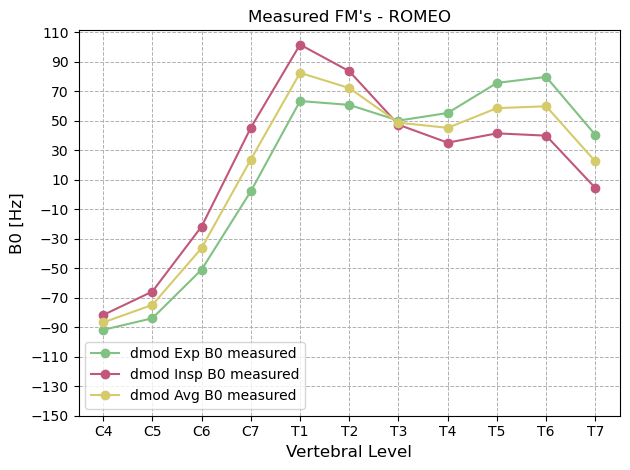

In [25]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "dmod Avg B0 measured", color = "#D5CB6A")

plt.title("Measured FM's - ROMEO")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

yticks = range(-150, 121, 20) 
plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [38]:
# Export average!
avg_respiration.to_csv(path_to_avg_metrics , index = False, header = True)

### Simualted FM loading, demod, extract metric and plot! </br>
Here we bring the data from the simulation with an initial assumption of chi value for trachea and lung </br>
This helps confirm the shape of the curves and the dimension of the graphs

In [25]:
from utils.show_slice import display_nifti_slice
from convert_fm import convert_ppm_data_to_Hz_data
from extract_metric import extract_metrics
import re

In [10]:
dmod_mask_img = nib.load(path_to_dmod_mask)
dmod_mask_data = dmod_mask_img.get_fdata()

metric_mask_img = nib.load(path_to_labeled_cord)
metric_mask_data = metric_mask_img.get_fdata()

In [30]:
curr_fm = nib.load(os.path.join(path_to_fms,"dB0_033_sim_fm_ppm.nii.gz"))
curr_fm_data = curr_fm.get_fdata()

sim_dmod_value = np.mean(curr_fm_data[dmod_mask_data==1])
print("Demod value for sim_fm:", sim_dmod_value)

curr_dmod_fm_ppm = curr_fm_data - sim_dmod_value
dmod_fm_Hz = convert_ppm_data_to_Hz_data(curr_dmod_fm_ppm,3)


dmod_save_path = os.path.join(path_to_dmod_folder,"initial_dmod_sim_fm.nii.gz")
dmod_fm_img = nib.Nifti1Image(dmod_fm_Hz, affine = curr_fm.affine)
nib.save(dmod_fm_img,dmod_save_path)
outfn = os.path.join(path_to_metrics,"initial_dmod_sim_fm.csv")
extract_metrics(dmod_save_path, path_to_dmod_mask, path_to_labeled_cord, outfn, method='wa', vert="3:14")

sim_metric_df = pd.read_csv(outfn)

sim_metric_values = sim_metric_df['WA()']
sim_metric_values = sim_metric_values[::-1]




Demod value for sim_fm: -3.0527928393537147
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/V1_dmod_sim\initial_dmod_sim_fm.nii.gz -f E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 3:14 -vertfile E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics\initial_dmod_sim_fm.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/dB0_033_dup1/fm/sim/D4_metrics\initial_dmod_sim_fm.csv




In [ ]:
plt.plot(vertebrae_levels, sim_metric_values, marker = 'o', linestyle = '--', label = "Chi tr & Lung = -4.36", color = "#4d79ff")

# Copy and paste plot on top here:
plt.plot(vertebrae_levels, exp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Exp B0 measured", color = "green")
plt.plot(vertebrae_levels, insp_metrics_data, marker = 'o', linestyle = '-', label = "dmod Insp B0 measured", color = "red")
plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = '-', label = "dmod Avg B0 measured", color = "#C28AD1")

plt.title("Oficial FM comparison plot")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# <span style="color:#26A69A"> Ploting raw and absolute B0 maps </span> 

In [11]:
central_freq_scan = 123.249391 # in MHz, from scan acquistion
gamma_bar = 42.58 # MHz/T
# If the central frequency from the scanner is 123.249489 MHz, it meas the B0 strenght we need to simulate is:
B0_used_scanner = central_freq_scan /gamma_bar
print("The B0 to use in the simulation should be: ", B0_used_scanner)

water_Hz_xT = B0_used_scanner * gamma_bar # This comes from Larmor equation, gyromagnetic ratio in MHz/T
print(f"Frequency of water at {B0_used_scanner}: ", water_Hz_xT, "MHz")


The B0 to use in the simulation should be:  2.894537130108032
Frequency of water at 2.894537130108032:  123.249391 MHz


In [12]:
abs_exp_metrics = raw_exp_metrics 
raw_exp35_metrics = raw_exp_metrics
abs_exp_metrics

10   -277.540653
9    -269.654259
8    -236.683647
7    -183.535555
6    -122.279939
5    -124.904195
4    -135.579613
3    -130.387474
2    -109.990501
1    -105.908986
0    -145.287181
Name: WA(), dtype: float64

In [13]:
abs_insp_metrics = raw_insp_metrics 
raw_insp35_metrics = raw_insp_metrics
abs_insp_metrics

10   -262.554534
9    -246.609818
8    -202.511716
7    -135.477820
6     -79.083717
5     -97.146527
4    -133.440034
3    -145.607452
2    -139.295199
1    -140.858648
0    -176.396718
Name: WA(), dtype: float64

In [14]:
raw_avg_respiration = (raw_exp_metrics+raw_insp_metrics)/2

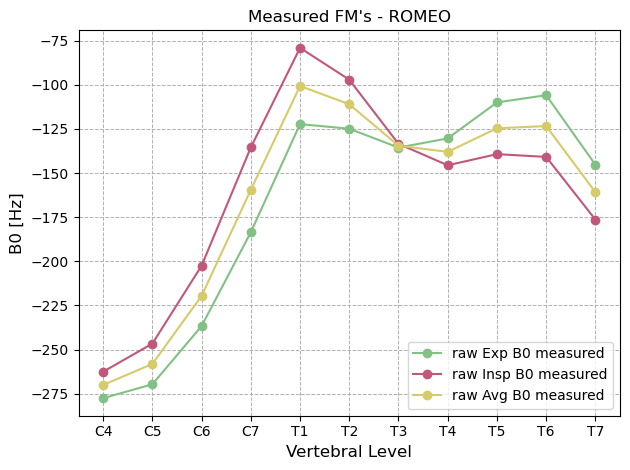

In [14]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 3 to 14
plt.plot(vertebrae_levels, raw_exp_metrics, marker = 'o', linestyle = '-', label = "raw Exp B0 measured", color = "#81C184")
plt.plot(vertebrae_levels, raw_insp_metrics, marker = 'o', linestyle = '-', label = "raw Insp B0 measured", color = "#C1577B")
plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

plt.title("Measured FM's - ROMEO")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# <span style="color:#8D6E63"> *All Subjects* </span> 

In [15]:
# Lets bring the other raw data to plot together:
raw_exp33_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/exp/raw_exp_metrics.csv"
raw_exp33_metrics_csv = pd.read_csv(raw_exp33_metrics_path)
raw_exp33_metrics= raw_exp33_metrics_csv['WA()'][::-1]

raw_insp33_metrics_path = "E:/msc_data/ismrm_2025/dB0_033_dup1/fm/C1_meas/insp/raw_insp_metrics.csv"
raw_insp33_metrics_df = pd.read_csv(raw_insp33_metrics_path)
raw_insp33_metrics = raw_insp33_metrics_df['WA()'][::-1]

raw_exp32_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\exp/raw_exp_metrics.csv"
raw_exp32_metrics_csv = pd.read_csv(raw_exp32_B0_metrics_path)
raw_exp32_metrics= raw_exp32_metrics_csv['WA()'][::-1]

raw_insp32_B0_metrics_path = r"E:\msc_data\ismrm_2025\db0_032\fm\C1_meas\insp/raw_insp_metrics.csv"
raw_insp32_metrics_csv = pd.read_csv(raw_insp32_B0_metrics_path)
raw_insp32_metrics = raw_insp32_metrics_csv['WA()'][::-1]

In [16]:
# Fixing "n" pi wraps:
# Lets calculate the frequency offset from "n" pi wraps
central_freq33 = 123.249489 # MHz
gamma_bar = 42.58 # MHz per Tesla
n = 2
gamma = gamma_bar*2*np.pi # rd / (s.T)
deltaTE_33= 5.2-3.27
B0_used_scanner_33 = central_freq33 / gamma_bar

freq_offset_npi_33 = (central_freq33*n*np.pi)/(gamma*deltaTE_33*1e-3*B0_used_scanner_33)

print(f"Frequency offset from a {n} pi wrap: ",freq_offset_npi_33," Hz")

Frequency offset from a 2 pi wrap:  518.1347150259068  Hz


In [17]:
exp_corrected_metrics33 = raw_exp33_metrics - np.abs(freq_offset_npi_33)

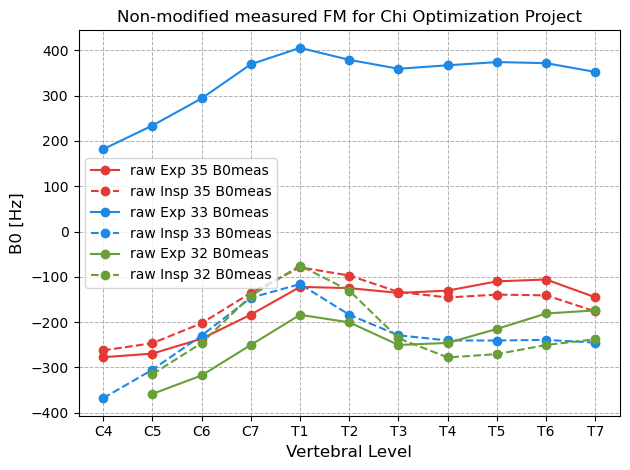

In [18]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, raw_exp35_metrics, marker = 'o', linestyle = '-', label = "raw Exp 35 B0meas", color = "#E53935")
plt.plot(vertebrae_levels, raw_insp35_metrics, marker = 'o', linestyle = '--', label = "raw Insp 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, raw_exp33_metrics, marker = 'o', linestyle = '-', label = "raw Exp 33 B0meas", color = "#1E88E5")
plt.plot(vertebrae_levels, raw_insp33_metrics, marker = 'o', linestyle = '--', label = "raw Insp 33 B0meas", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, raw_exp32_metrics, marker = 'o', linestyle = '-', label = "raw Exp 32 B0meas", color = "#689F38")
plt.plot(vertebrae_levels2, raw_insp32_metrics, marker = 'o', linestyle = '--', label = "raw Insp 32 B0meas", color = "#689F38")

plt.title("Non-modified measured FM for Chi Optimization Project")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

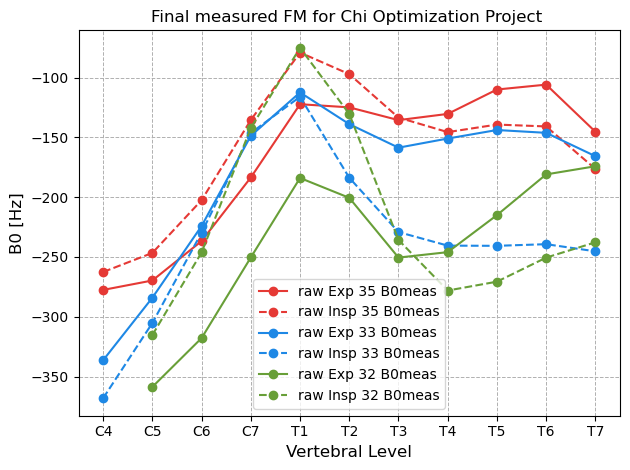

In [18]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, raw_exp35_metrics, marker = 'o', linestyle = '-', label = "raw Exp 35 B0meas", color = "#E53935")
plt.plot(vertebrae_levels, raw_insp35_metrics, marker = 'o', linestyle = '--', label = "raw Insp 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, exp_corrected_metrics33, marker = 'o', linestyle = '-', label = "raw Exp 33 B0meas", color = "#1E88E5")
plt.plot(vertebrae_levels, raw_insp33_metrics, marker = 'o', linestyle = '--', label = "raw Insp 33 B0meas", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, raw_exp32_metrics, marker = 'o', linestyle = '-', label = "raw Exp 32 B0meas", color = "#689F38")
plt.plot(vertebrae_levels2, raw_insp32_metrics, marker = 'o', linestyle = '--', label = "raw Insp 32 B0meas", color = "#689F38")

plt.title("Final measured FM for Chi Optimization Project ")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# <span style="color:#C28AD1"> Average Insp and Exp all subjects </span> 

In [19]:
avg_measured_32 = (raw_exp32_metrics + raw_insp32_metrics)/2

avg_measured_33 = (exp_corrected_metrics33 + raw_insp33_metrics)/2

avg_measured_35 = (raw_exp35_metrics + raw_insp35_metrics)/2

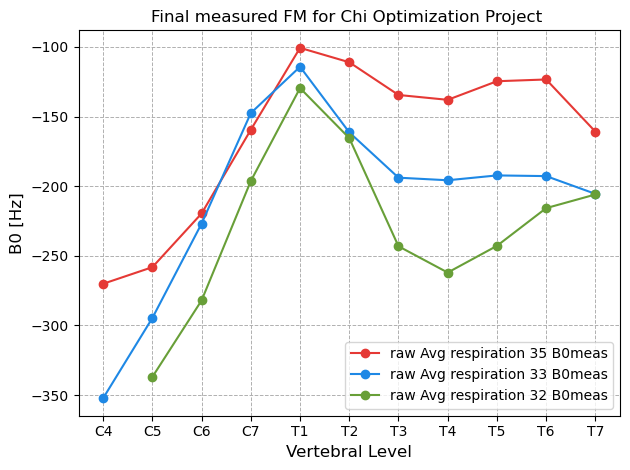

In [20]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, avg_measured_35, marker = 'o', linestyle = '-', label = "raw Avg respiration 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, avg_measured_33, marker = 'o', linestyle = '-', label = "raw Avg respiration 33 B0meas", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, avg_measured_32, marker = 'o', linestyle = '-', label = "raw Avg respiration 32 B0meas", color = "#689F38")

plt.title("Final measured FM for Chi Optimization Project ")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# <span style="color:#bf3d79"> Loading simulations </span> </br>
These are simulations that assume that $\chi$ trachea and lungs are equal to -4.2 ppm


In [21]:
path_to_ref_zero_fm33_Hz = r"E:\msc_data\ismrm_2025\dB0_033_dup1\fm\sim/raw_sim_fm_ref_zero_Hz.csv"
path_to_ref_zero_fm32_Hz = r"E:\msc_data\ismrm_2025\db0_032\fm\sim/raw_sim_fm_ref_zero_Hz.csv"

central_freq_scan33 = 123.249489 # MHz
central_freq_scan32 = 123.249521 # MHz

In [22]:
raw_sim_fm33_ref_zero_Hz_csv = pd.read_csv(path_to_ref_zero_fm33_Hz)
raw_sim_fm33_ref_zero_Hz_data = raw_sim_fm33_ref_zero_Hz_csv["WA()"]

raw_sim_fm32_ref_zero_Hz_csv = pd.read_csv(path_to_ref_zero_fm32_Hz)
raw_sim_fm32_ref_zero_Hz_data = raw_sim_fm32_ref_zero_Hz_csv["WA()"]


In [23]:
raw_sim_fm33_ref_zero_Hz_data

0    -441.225387
1    -430.529217
2    -403.820432
3    -369.662811
4    -359.669588
5    -386.808811
6    -401.979587
7    -396.963986
8    -389.762675
9    -397.040960
10   -399.648116
Name: WA(), dtype: float64

In [24]:
raw_sim_fm32_ref_zero_Hz_data

0   -391.598143
1   -332.189663
2   -246.536959
3   -211.086936
4   -221.311394
5   -222.766399
6   -202.743319
7   -178.068501
8   -164.932542
9   -176.421745
Name: WA(), dtype: float64

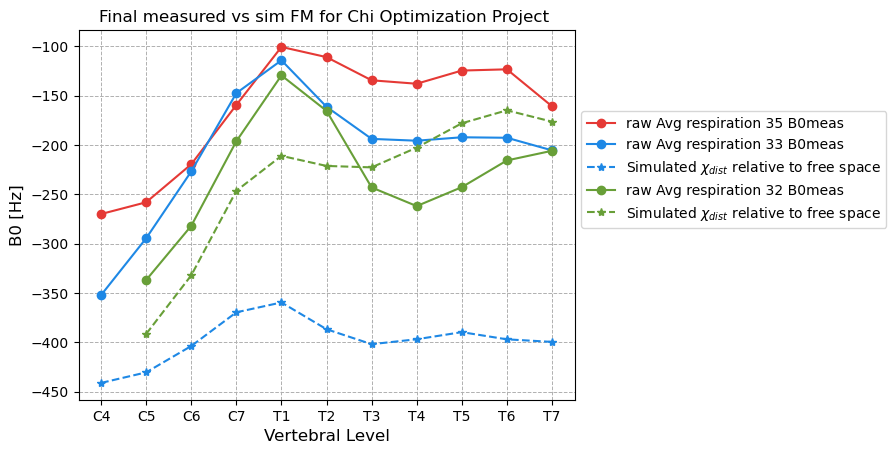

In [73]:
vertebrae_levels = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 4 to 14
vertebrae_levels2 = ['C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'] # From 5 to 14
# db0_035:
plt.plot(vertebrae_levels, avg_measured_35, marker = 'o', linestyle = '-', label = "raw Avg respiration 35 B0meas", color = "#E53935")
#plt.plot(vertebrae_levels, raw_avg_respiration, marker = 'o', linestyle = '-', label = "raw Avg B0 measured", color = "#D5CB6A")

# db0_033:
plt.plot(vertebrae_levels, avg_measured_33, marker = 'o', linestyle = '-', label = "raw Avg respiration 33 B0meas", color = "#1E88E5")
plt.plot(vertebrae_levels, raw_sim_fm33_ref_zero_Hz_data, marker = '*', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to free space", color = "#1E88E5")

# db0_032:
plt.plot(vertebrae_levels2, avg_measured_32, marker = 'o', linestyle = '-', label = "raw Avg respiration 32 B0meas", color = "#689F38")
plt.plot(vertebrae_levels2, raw_sim_fm32_ref_zero_Hz_data, marker = '*', linestyle = '--', label = r"Simulated $\chi_{dist}$ relative to free space", color = "#689F38")
 
plt.title("Final measured vs sim FM for Chi Optimization Project ")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.8))

#yticks = range(-150, 121, 20) 
#plt.yticks(yticks)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.tight_layout()


# Show the plot
plt.show()